In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 13.0 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.64-py2.py3-none-any.whl size=24109 sha256=3441641ded4562725ccb417ccc017d7675136ad79534625ef797f6c309208526
  Stored in directory: /root/.cache/pip/wheels/86/fe/9b/a4d3d78796b699e37065e5b6c27b75cff448ddb8b24943c288
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data = yf.download('BTC-USD ETH-USD XRP-USD DOGE-USD ADA-USD SPY TDEX.BK', period= '2y', interval='1d')

[*********************100%***********************]  7 of 7 completed


In [ ]:
df = data.Close


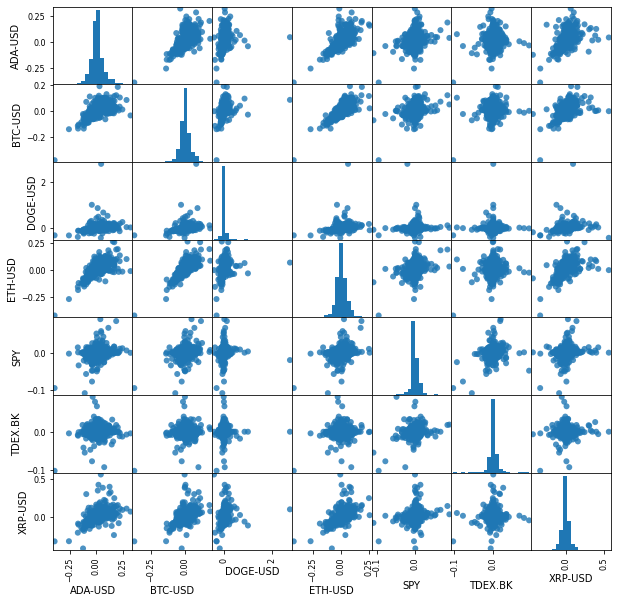

In [ ]:
pd.plotting.scatter_matrix(df.pct_change(), figsize= (10,10),
                           marker = 'o', hist_kwds = {'bins': 20}, alpha= 0.8);

In [ ]:
import seaborn as sns

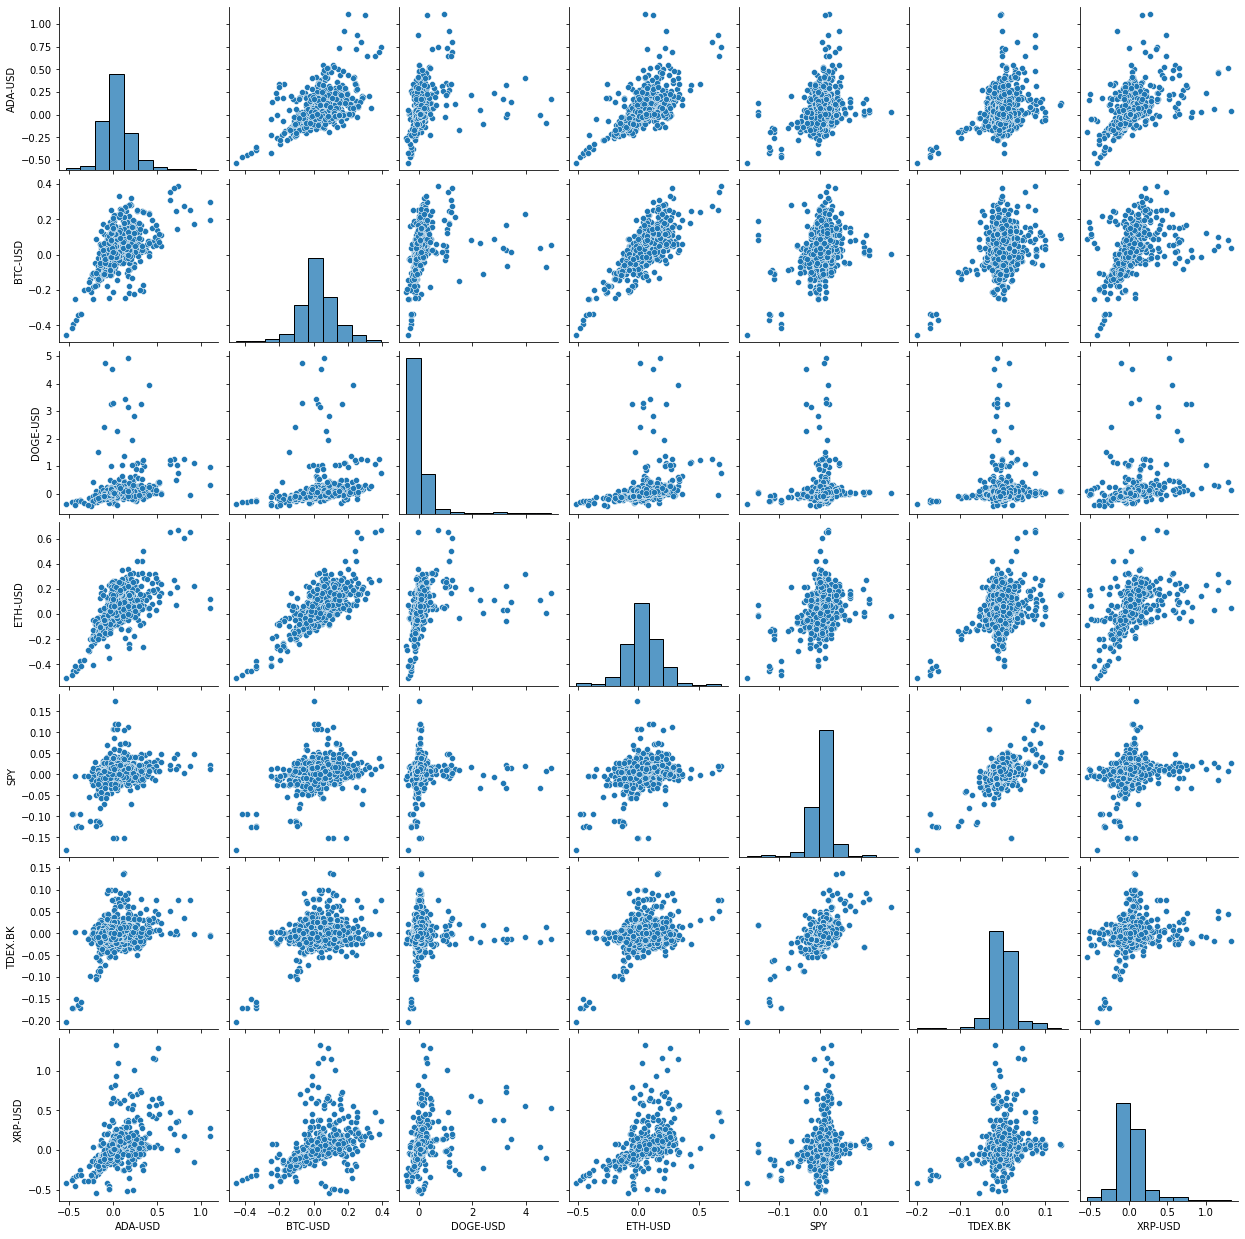

In [ ]:
sns.pairplot(df.pct_change(7), diag_kws= {'bins' : 10})

In [ ]:
# main data for analyze, view as table
df.pct_change(7).corr()

,ADA-USD,BTC-USD,DOGE-USD,ETH-USD,SPY,TDEX.BK,XRP-USD
ADA-USD,1.000000,0.579120,0.281530,0.633463,0.302008,0.327688,0.489823
BTC-USD,0.579120,1.000000,0.243842,0.769356,0.293049,0.336256,0.425580
DOGE-USD,0.281530,0.243842,1.000000,0.311967,0.062764,0.046396,0.318457
ETH-USD,0.633463,0.769356,0.311967,1.000000,0.358617,0.369631,0.504138
SPY,0.302008,0.293049,0.062764,0.358617,1.000000,0.590356,0.223771
TDEX.BK,0.327688,0.336256,0.046396,0.369631,0.590356,1.000000,0.232061
XRP-USD,0.489823,0.425580,0.318457,0.504138,0.223771,0.232061,1.000000


In [ ]:
df.pct_change(1).corr()

,ADA-USD,BTC-USD,DOGE-USD,ETH-USD,SPY,TDEX.BK,XRP-USD
ADA-USD,1.000000,0.632035,0.253512,0.705829,0.263739,0.097503,0.531859
BTC-USD,0.632035,1.000000,0.311779,0.795997,0.305943,0.131952,0.541809
DOGE-USD,0.253512,0.311779,1.000000,0.279702,0.043546,0.025217,0.228784
ETH-USD,0.705829,0.795997,0.279702,1.000000,0.296190,0.111017,0.581817
SPY,0.263739,0.305943,0.043546,0.296190,1.000000,0.290019,0.190782
TDEX.BK,0.097503,0.131952,0.025217,0.111017,0.290019,1.000000,0.087571
XRP-USD,0.531859,0.541809,0.228784,0.581817,0.190782,0.087571,1.000000


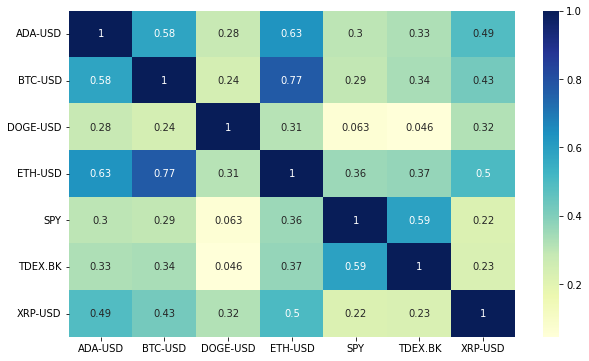

In [ ]:
#plot the heatmap
corr = df.pct_change(7).corr()
fig, ax = plt.subplots(figsize= (10,6))

sns.heatmap(
    corr,
    xticklabels= corr.columns,
    yticklabels= corr.columns,
    annot = True, # add number to chart
    cmap= 'YlGnBu'
)

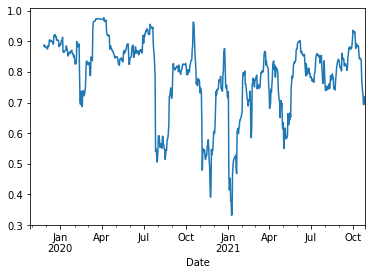

In [ ]:
df['BTC-USD'].pct_change().rolling(30).corr(df['ETH-USD'].pct_change()).plot()

In [ ]:
#BTC ETH Corr 2021 mean
btc_eth_2020 = df['BTC-USD'].pct_change().rolling(30).corr(df['ETH-USD'].pct_change()).loc['2020':].mean()
print('BTC/ETH 2020 CORR',btc_eth_2020)
btc_eth_2021 = df['BTC-USD'].pct_change().rolling(30).corr(df['ETH-USD'].pct_change()).loc['2021':].mean()
print('BTC/ETH 2021 CORR',btc_eth_2021)

BTC/ETH 2020 CORR 0.7829232836597309
BTC/ETH 2021 CORR 0.7615172693750365


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f84cd22d910>],
      dtype=object)

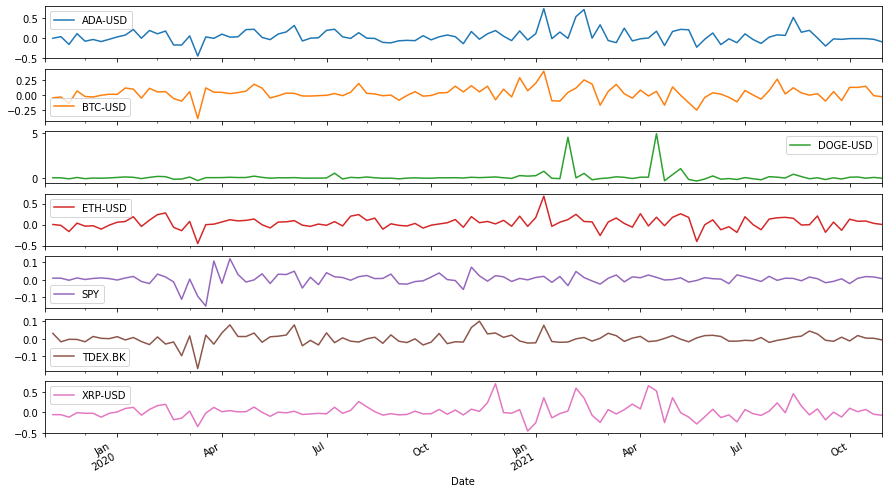

In [ ]:
# overview data
df.resample('W-FRI').last().pct_change().plot(subplots= True, layout= (8,1), figsize= (15,10))

In [ ]:
# Resample data
df_weekly = df.resample('W-Fri').last()

In [ ]:
df_weekly_corr = df_weekly.pct_change().corr()

In [ ]:
df_weekly_corr

,ADA-USD,BTC-USD,DOGE-USD,ETH-USD,SPY,TDEX.BK,XRP-USD
ADA-USD,1.000000,0.562041,0.206024,0.631104,0.277738,0.373080,0.586057
BTC-USD,0.562041,1.000000,0.191740,0.765891,0.234860,0.355503,0.478925
DOGE-USD,0.206024,0.191740,1.000000,0.278316,0.000934,-0.001325,0.314688
ETH-USD,0.631104,0.765891,0.278316,1.000000,0.336835,0.384405,0.547667
SPY,0.277738,0.234860,0.000934,0.336835,1.000000,0.488634,0.295137
TDEX.BK,0.373080,0.355503,-0.001325,0.384405,0.488634,1.000000,0.264131
XRP-USD,0.586057,0.478925,0.314688,0.547667,0.295137,0.264131,1.000000


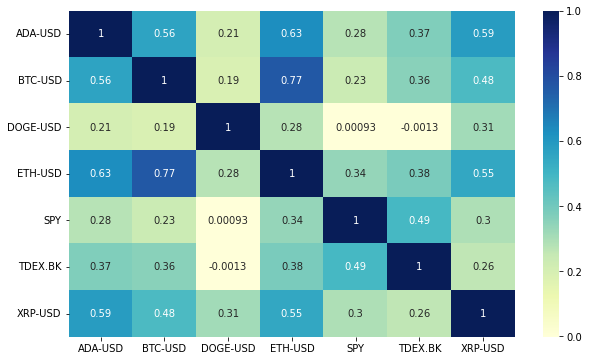

In [ ]:

fig, ax = plt.subplots(figsize= (10,6))

sns.heatmap(
    df_weekly_corr,
    xticklabels= corr.columns,
    yticklabels= corr.columns,
    annot = True, # add number to chart
    cmap= 'YlGnBu'
)

In [ ]:
df_bday = df.resample('B').last().iloc[1:]

In [ ]:
df_bday = df_bday.fillna(method= 'ffill')

In [ ]:
df_bday_corr = df_bday.pct_change(7).corr()

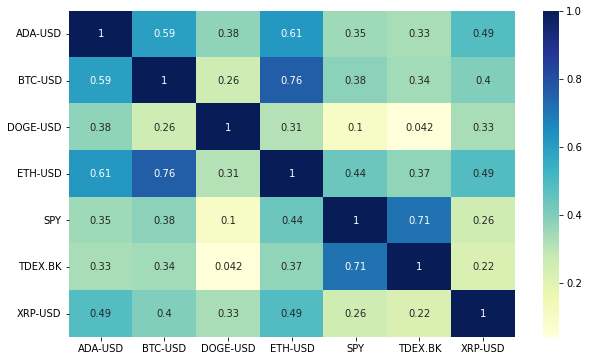

In [ ]:
fig, ax = plt.subplots(figsize= (10,6))

sns.heatmap(
    df_bday_corr,
    xticklabels= corr.columns,
    yticklabels= corr.columns,
    annot = True, # add number to chart
    cmap= 'YlGnBu'
)

# Dendogram and Linkage

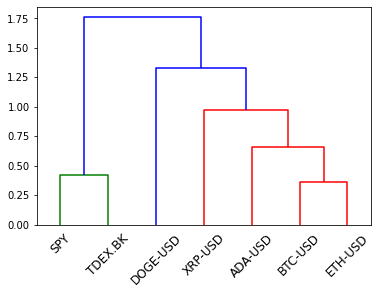

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(df_bday_corr, 'ward')
label_list = df.columns.to_list()

plt.figure()
dendrogram(linked,
           orientation = 'top',
           labels= label_list,
           leaf_rotation= 45)
plt.show();